**Feedforward Neural Network For Nonlinear Classification**

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

**Step 1: generating nonlinear data**

In [ ]:
# Generating nonlinear data (parabola)
np.random.seed(0)
X = (np.random.rand(1000, 2) - 0.5) * 2 # Generate random uniform data from (-1, 1)
y = (((X[:, 0])**2 - X[:, 1]) > 0).astype(int)
# y = 1 if X0^2 - X1 > 0 (above parabola)
# y = 0 if X0^2 - X1 <= 0 (below parabola)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_log, X_test_log, y_train_log, y_test_log = X_train, X_test, y_train, y_test

# Convert data to PyTorch tensors
X_train = torch.FloatTensor(X_train)
y_train = torch.FloatTensor(y_train)
X_test = torch.FloatTensor(X_test)
y_test = torch.FloatTensor(y_test)

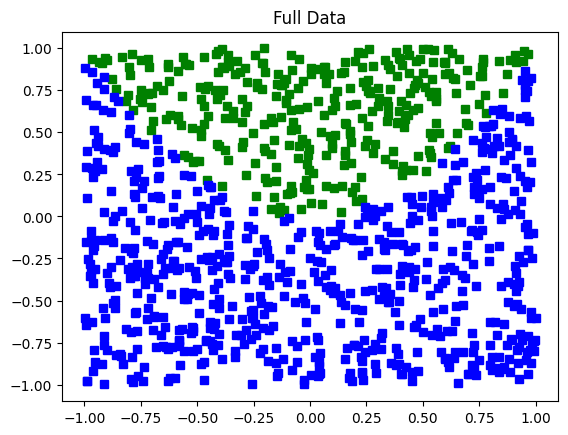

In [ ]:
plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], 'gs')
plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], 'bs')
plt.title("Full Data")
plt.show()

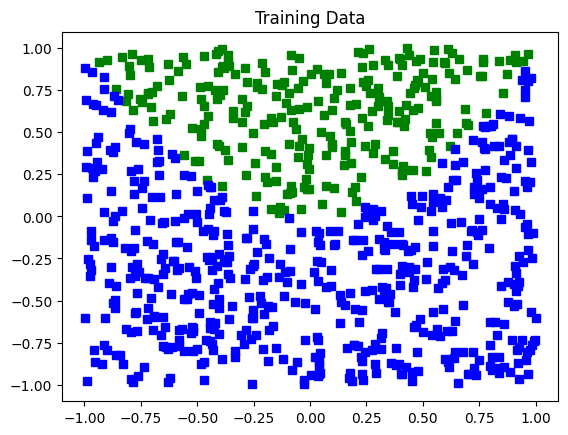

In [ ]:
plt.plot(X_train[:, 0][y_train == 0], X_train[:, 1][y_train == 0], 'gs')
plt.plot(X_train[:, 0][y_train == 1], X_train[:, 1][y_train == 1], 'bs')
plt.title("Training Data")
plt.show()

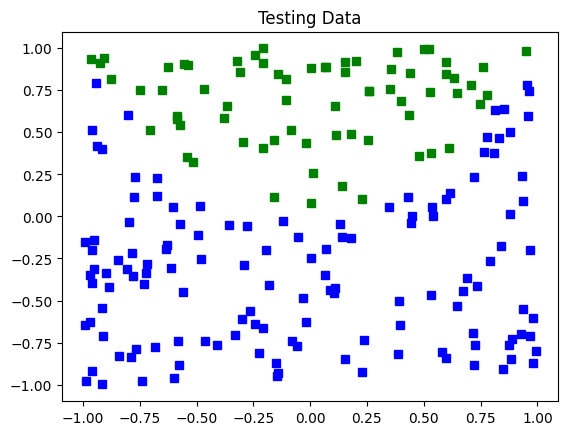

In [ ]:
plt.plot(X_test[:, 0][y_test == 0], X_test[:, 1][y_test == 0], 'gs')
plt.plot(X_test[:, 0][y_test == 1], X_test[:, 1][y_test == 1], 'bs')
plt.title("Testing Data")
plt.show()

**Step 2(a): Logistic Regression**

In [ ]:
from sklearn import linear_model

In [ ]:
logr = linear_model.LogisticRegression()
logr.fit(X_train_log,y_train_log)

LogisticRegression()

In [ ]:
logr_predicted = logr.predict(X_test_log)

print(f'Logistic Regression Test Accuracy: { sum(logr_predicted == y_test_log)/len(logr_predicted)}')

Logistic Regression Test Accuracy: 0.885


**Step 2(i): Plotting Logistic Regression Decision Boundary**

In [ ]:
x1_min, x1_max = X[:, 0].min() - 0.1, X[:,0].max() + 0.1
x2_min, x2_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1

In [ ]:
xx1, xx2 = np.meshgrid(np.linspace(x1_min,x1_max, 100),
np.linspace(x2_min, x2_max, 100))

logr_xx = np.linspace(x1_min, x1_max, 100)

In [ ]:
x_db = np.c_[xx1.ravel(), xx2.ravel()]

In [ ]:
b = logr.intercept_[0]
w1, w2 = logr.coef_.T
# Calculate the intercept and gradient of the decision boundary.
c = -b/w2
m = -w1/w2

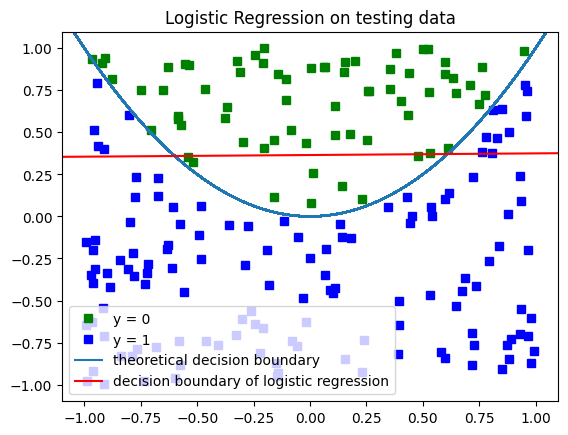

In [ ]:
logr_db_pred = logr.predict(x_db)

#plt.plot(x_db[:, 0][logr_db_pred == 0], x_db[:, 1][logr_db_pred == 0], 'gs', alpha = 0.05)
#plt.plot(x_db[:, 0][logr_db_pred == 1], x_db[:, 1][logr_db_pred == 1], 'bs', alpha = 0.05)
plt.plot(X_test[:, 0][y_test == 0], X_test[:, 1][y_test == 0], 'gs', label = "y = 0")
plt.plot(X_test[:, 0][y_test == 1], X_test[:, 1][y_test == 1], 'bs', label = "y = 1")
plt.plot(x_db[:, 0], x_db[:, 0] ** 2, label = "theoretical decision boundary") # theoretical decision boundary
plt.plot(logr_xx, m * logr_xx + c, color = 'red', alpha = 1, label = "decision boundary of logistic regression")

plt.title("Logistic Regression on testing data")
plt.xlim(xx1.min(), xx1.max())
plt.ylim(xx2.min(), xx2.max())

plt.legend(loc = "lower left")
plt.show()

Decision boundary is linear and doesn't fit the data very well

**Step 3: Feedforward Neural Network with 2 neurons**

In [ ]:
neurons = 2

class BinaryClassifier_2Layer(nn.Module):
    def __init__(self, input_size):
        super(BinaryClassifier_2Layer, self).__init__() # 2 layers:
        self.layer1 = nn.Linear(input_size, neurons)  # Input size to number of neurons
        self.sigmoid = nn.Sigmoid() #Sigmoid activation function
        self.layer2 = nn.Linear(neurons, 1)  # reduce to 1 ouput (binary classification)

    def forward(self, x): # forward step, actually predicting the value
        x = self.layer1(x)
        x = self.sigmoid(x)
        x = self.layer2(x)
        x = self.sigmoid(x)
        return x

In [ ]:
input_size = X_train.shape[1]
model = BinaryClassifier_2Layer(input_size)

criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [ ]:
num_epochs = 20000

for epoch in range(num_epochs):
    # Forward pass
    outputs = model(X_train)
    loss = criterion(outputs, y_train.view(-1, 1))

    # Backpropagation and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 5000 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Model training complete

Epoch [5000/20000], Loss: 0.1535
Epoch [10000/20000], Loss: 0.0627
Epoch [15000/20000], Loss: 0.0464
Epoch [20000/20000], Loss: 0.0399


**Step 3(i) Plotting Decision Boundary trained on randomly chosen training data points**

In [ ]:
model.state_dict()

OrderedDict([('layer1.weight',
              tensor([[ 8.3005, -7.4028],
                      [-6.6819, -5.9211]])),
             ('layer1.bias', tensor([-1.4283, -1.0080])),
             ('layer2.weight', tensor([[16.5477, 16.7877]])),
             ('layer2.bias', tensor([-10.1300]))])

In [ ]:
# extracting weights and biases for hyperplane

layer1_weight = model.state_dict()["layer1.weight"]
layer1_bias = model.state_dict()["layer1.bias"]

hyperplanes = []

for i in range(layer1_weight.shape[0]):
    w = layer1_weight[i].numpy()  # or keep as tensor if preferred
    b = layer1_bias[i].item()
    hyperplanes.append((w, b))  # (weight vector, bias)

xx = np.linspace(x1_min, x1_max, 100)

(-1.0992653124970844, 1.0985559878443423)

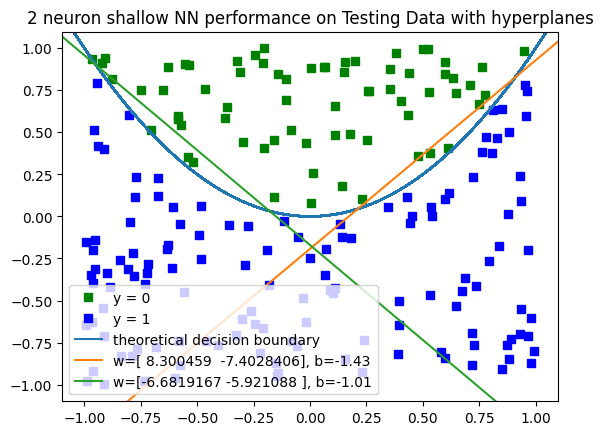

In [ ]:
#db_pred = model(torch.FloatTensor(x_db))
#db_pred = torch.Tensor.numpy((db_pred > 0.5).float()).flatten()

#plt.plot(x_db[:, 0][db_pred == 0], x_db[:, 1][db_pred == 0], 'gs', alpha = 0.05)
#plt.plot(x_db[:, 0][db_pred == 1], x_db[:, 1][db_pred == 1], 'bs', alpha = 0.05)
plt.plot(X_test[:, 0][y_test == 0], X_test[:, 1][y_test == 0], 'gs', label = "y = 0")
plt.plot(X_test[:, 0][y_test == 1], X_test[:, 1][y_test == 1], 'bs', label = "y = 1")
plt.plot(x_db[:, 0], x_db[:, 0] ** 2, label = "theoretical decision boundary") # theoretical decision boundary
for w, b in hyperplanes: # plotting hyperplanes
  y_vals = -(w[0]/w[1]) * xx - b/w[1]
  plt.plot(xx, y_vals, label=f"w={w}, b={b:.2f}")


plt.legend(loc = "lower left")
plt.title("2 neuron shallow NN performance on Testing Data with hyperplanes")
plt.xlim(xx1.min(), xx1.max())
plt.ylim(xx2.min(), xx2.max())

In [ ]:
with torch.no_grad():
    model.eval()

    predictions = model(X_test)
    predictions = (predictions > 0.5).float()

accuracy = torch.sum(predictions == y_test.view(-1, 1)).item() / y_test.shape[0]
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.97


With 2 hyperplanes, reaches 0.97 accuracy.

**Step 4: How many hyperplanes does it take to reach 0.99 or 1 accuracy? Training shallow neural networks with # of neurons from 3-10**

In [ ]:
accuracies = []

for i in range(3, 10):
    neurons = i

    class BinaryClassifier(nn.Module):
        def __init__(self, input_size):
            super(BinaryClassifier, self).__init__() # 2 layers:
            self.layer1 = nn.Linear(input_size, neurons)  # Input size to number of neurons
            self.sigmoid = nn.Sigmoid() #Sigmoid activation function
            self.layer2 = nn.Linear(neurons, 1)  # reduce to 1 ouput (binary classification)

        def forward(self, x): # forward step, actually predicting the value
            x = self.layer1(x)
            x = self.sigmoid(x)
            x = self.layer2(x)
            x = self.sigmoid(x)
            return x

    input_size = X_train.shape[1]
    model = BinaryClassifier(input_size)

    criterion = nn.BCELoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    num_epochs = 20000

    for epoch in range(num_epochs):
        # Forward pass
        outputs = model(X_train)
        loss = criterion(outputs, y_train.view(-1, 1))

        # Backpropagation and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()



    # Model training complete

    with torch.no_grad():
        model.eval()

        predictions = model(X_test)
        predictions = (predictions > 0.5).float()

    accuracy = torch.sum(predictions == y_test.view(-1, 1)).item() / y_test.shape[0]
    accuracies.append(accuracy)

In [ ]:
accuracies

[0.995, 0.995, 0.995, 0.995, 0.995, 0.995, 1.0]

2 neurons reaches 0.975 accuracy, 3-10 layers achieves 0.995 accuracy but no further

**Step 5: Training a 3 neuron shallow neural network**

In [ ]:
neurons = 3

class BinaryClassifier(nn.Module):
    def __init__(self, input_size):
        super(BinaryClassifier, self).__init__() # 2 layers:
        self.layer1 = nn.Linear(input_size, neurons)  # Input size to number of neurons
        self.sigmoid = nn.Sigmoid() #Sigmoid activation function
        self.layer2 = nn.Linear(neurons, 1)  # reduce to 1 ouput (binary classification)
    def forward(self, x): # forward step, actually predicting the value
        x = self.layer1(x)
        x = self.sigmoid(x)
        x = self.layer2(x)
        x = self.sigmoid(x)
        return x

input_size = X_train.shape[1]
model = BinaryClassifier(input_size)

criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

num_epochs = 20000

for epoch in range(num_epochs):
    # Forward pass
    outputs = model(X_train)
    loss = criterion(outputs, y_train.view(-1, 1))

    # Backpropagation and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()



# Model training complete

with torch.no_grad():
    model.eval()

    predictions = model(X_test)
    predictions = (predictions > 0.5).float()

accuracy = torch.sum(predictions == y_test.view(-1, 1)).item() / y_test.shape[0]
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.99


**Step 5(i) Plotting hyperplanes**

In [ ]:
# extracting weights and biases for hyperplane

layer1_weight = model.state_dict()["layer1.weight"]
layer1_bias = model.state_dict()["layer1.bias"]

hyperplanes = []

for i in range(layer1_weight.shape[0]):
    w = layer1_weight[i].numpy()  # or keep as tensor if preferred
    b = layer1_bias[i].item()
    hyperplanes.append((w, b))  # (weight vector, bias)

xx = np.linspace(x1_min, x1_max, 100)

(-1.0992653124970844, 1.0985559878443423)

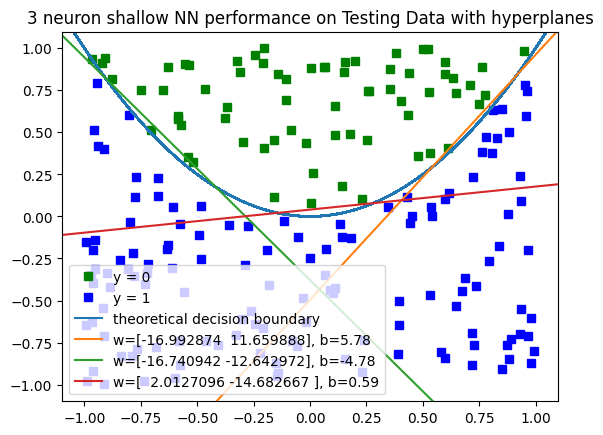

In [ ]:
#db_pred = model(torch.FloatTensor(x_db))
#db_pred = torch.Tensor.numpy((db_pred > 0.5).float()).flatten()

#plt.plot(x_db[:, 0][db_pred == 0], x_db[:, 1][db_pred == 0], 'gs', alpha = 0.05)
#plt.plot(x_db[:, 0][db_pred == 1], x_db[:, 1][db_pred == 1], 'bs', alpha = 0.05)
plt.plot(X_test[:, 0][y_test == 0], X_test[:, 1][y_test == 0], 'gs', label = "y = 0")
plt.plot(X_test[:, 0][y_test == 1], X_test[:, 1][y_test == 1], 'bs', label = "y = 1")
plt.plot(x_db[:, 0], x_db[:, 0] ** 2, label = "theoretical decision boundary") # theoretical decision boundary
for w, b in hyperplanes: # plotting hyperplanes
  y_vals = -(w[0]/w[1]) * xx - b/w[1]
  plt.plot(xx, y_vals, label=f"w={w}, b={b:.2f}")


plt.legend(loc = "lower left")
plt.title("3 neuron shallow NN performance on Testing Data with hyperplanes")
plt.xlim(xx1.min(), xx1.max())
plt.ylim(xx2.min(), xx2.max())

**Step 6: 9 neurons**

In [ ]:
neurons = 9

class BinaryClassifier(nn.Module):
    def __init__(self, input_size):
        super(BinaryClassifier, self).__init__() # 2 layers:
        self.layer1 = nn.Linear(input_size, neurons)  # Input size to number of neurons
        self.sigmoid = nn.Sigmoid() #Sigmoid activation function
        self.layer2 = nn.Linear(neurons, 1)  # reduce to 1 ouput (binary classification)
    def forward(self, x): # forward step, actually predicting the value
        x = self.layer1(x)
        x = self.sigmoid(x)
        x = self.layer2(x)
        x = self.sigmoid(x)
        return x

input_size = X_train.shape[1]
model = BinaryClassifier(input_size)

criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

num_epochs = 20000

for epoch in range(num_epochs):
    # Forward pass
    outputs = model(X_train)
    loss = criterion(outputs, y_train.view(-1, 1))

    # Backpropagation and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()



# Model training complete

with torch.no_grad():
    model.eval()

    predictions = model(X_test)
    predictions = (predictions > 0.5).float()

accuracy = torch.sum(predictions == y_test.view(-1, 1)).item() / y_test.shape[0]
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 1.00


Step 6(i) Plotting Hyperplanes

In [ ]:
# extracting weights and biases for hyperplane

layer1_weight = model.state_dict()["layer1.weight"]
layer1_bias = model.state_dict()["layer1.bias"]

hyperplanes = []

for i in range(layer1_weight.shape[0]):
    w = layer1_weight[i].numpy()  # or keep as tensor if preferred
    b = layer1_bias[i].item()
    hyperplanes.append((w, b))  # (weight vector, bias)

xx = np.linspace(x1_min, x1_max, 100)

(-1.0992653124970844, 1.0985559878443423)

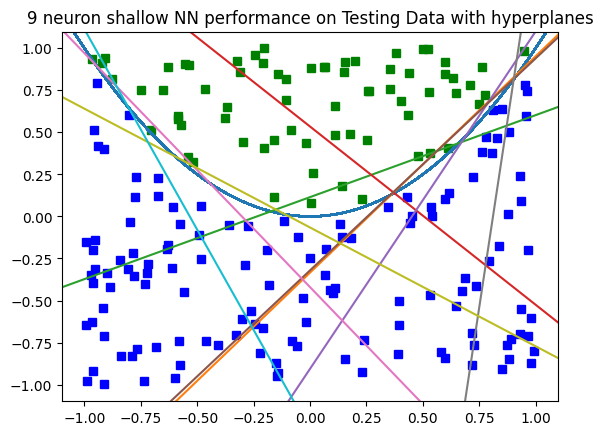

In [ ]:
#db_pred = model(torch.FloatTensor(x_db))
#db_pred = torch.Tensor.numpy((db_pred > 0.5).float()).flatten()

#plt.plot(x_db[:, 0][db_pred == 0], x_db[:, 1][db_pred == 0], 'gs', alpha = 0.05)
#plt.plot(x_db[:, 0][db_pred == 1], x_db[:, 1][db_pred == 1], 'bs', alpha = 0.05)
plt.plot(X_test[:, 0][y_test == 0], X_test[:, 1][y_test == 0], 'gs', label = "y = 0")
plt.plot(X_test[:, 0][y_test == 1], X_test[:, 1][y_test == 1], 'bs', label = "y = 1")
plt.plot(x_db[:, 0], x_db[:, 0] ** 2, label = "theoretical decision boundary") # theoretical decision boundary
for w, b in hyperplanes: # plotting hyperplanes
  y_vals = -(w[0]/w[1]) * xx - b/w[1]
  plt.plot(xx, y_vals, label=f"w={w}, b={b:.2f}")


plt.title("9 neuron shallow NN performance on Testing Data with hyperplanes")
plt.xlim(xx1.min(), xx1.max())
plt.ylim(xx2.min(), xx2.max())